<a href="https://colab.research.google.com/github/0ROHAN0/CMPE255_HW/blob/main/HW3_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 3: Supervised Learning on the Bank Marketing Dataset

The original dataset is available here: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
We have a modified subset of this dataset to practice data  preprocessing. 

Perform the following tasks on the provided clean bank marketing dataset before encoding and scaling (bank-hw1.csv contains the dataset and bank-names.txt contains the description of the original dataset). 
* Complete all the [LP] questions to receive a "low pass" grade on the homework. 
* Complete all the [LP] questions and [HP 1] and [HP 2] to receive a "high pass" grade on the homework. 
* Passing the question marked [HP+] is not required to receive a "high pass" grade. However, it is necessary for an A+ in the course.

Note that if you are unable to complete any of the LP questions satisfactorily, you will receive a grade of "revision required". You can revise and resubmit your work in exchange for a token. Please review the syllabus for more information on specifications grading.

**VERY IMPORTANT**: Include **ALL** the references you used for this assignment, including names of classmates you discuss with. Failure to cite your sources counts as an act of academic dishonesty and will be taken seriously without zero tolerance. You will automatically receive a “fail” grade in the homework and further serious penalties may be imposed.

NOTE: You can look for help on the Internet but refrain from referencing too much. Please cite all your sources in your submission. 
When you submit your assignment, you automatically agree to the following statement. If you do not agree, it is your responsibility to provide the reason.

“*I affirm that I have neither given nor received unauthorized help in completing this homework. I am not aware of others receiving such help. I have cited all the sources in the solution file.*”

[LP 1] Import the provided clean data file, your preprocessed dataset from HW1, or clean the dataset here. Extract the following columns:

1. duration: all entries must be non-negative
2. campaign
3. pdays
4. previous

The set of values in each column and their meaning is provided in the bank-names.txt file. You can use the information to make decisions. Please explain your choices if you are preprocessing the dataset again here OR comment that you are using your preprocessed dataset from HW1. 

**Q1. How do you figure out if the dataset is imbalanced?**

First, make sure you have a balanced dataset to work with. A balanced dataset is one where there are an equal number of positive and negative samples. Find if the bank marketing dataset is imbalanced. 


**Q2. Balance this dataset.**
You are recommended to use a Random [Undersampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html). Sample code is provided below. 

In [98]:
import pandas as pd
##Replace path with your file location
path = '/content/bank_cleaned_dataset.csv'
bank = pd.read_csv(path) 
X = bank.values
y = bank[["y"]]

In [99]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)

In [100]:
# Your code for LP1 goes here
# Feel free to add cells below this for LP1

bank_data = bank[['duration', 'campaign', 'pdays','previous', 'y']]
bank_data

,duration,campaign,pdays,previous,y
0,0.065230,0.163265,0.000000,0.000000,0
1,0.084741,0.306122,0.000000,0.000000,0
2,0.143856,0.000000,0.222491,0.081081,1
3,0.039313,0.081633,0.000000,0.000000,0
4,0.105416,0.000000,0.000000,0.000000,0
...,...,...,...,...,...
2241,0.059988,0.081633,0.332527,0.297297,0
2242,0.064648,0.000000,0.000000,0.000000,0
2243,0.086488,0.020408,0.000000,0.000000,0
2244,0.050961,0.000000,0.000000,0.000000,0


In [101]:
heading = ['duration', 'campaign', 'pdays', 'previous', 'y']
print("Printiing the total number of null values present in each column:")
for i in heading:
  q1 = bank_data[i].isnull().sum()
  print(q1)
print("The data set seems to be balances")

Printiing the total number of null values present in each column:
5
2
3
0
0
The data set seems to be balances


Here, in each class colon there is not much difference in the data present in the class. The only null values are 5, 2 and 3 accordingly in first 3 colons. Thus compared to 2246 row of data it is negligible amount.  

In [102]:
# for i in heading:
#   j = bank_data[i]

for k in heading:
  lower= 0
  upper= 0
  zero = 0
  for i in range(0,2246):
    j = round(bank_data[k].iloc[i],4)
    if (j<0):
      lower += 1
    elif (j>0):
      upper +=1
    elif (j==0):
      zero +=1
  print("for {},\n number of negative values are = {} and the total number of positive values are {}, number of zeroes are  = {}".format(k.upper(),lower,upper, zero))


for DURATION,
 number of negative values are = 0 and the total number of positive values are 2240, number of zeroes are  = 1
for CAMPAIGN,
 number of negative values are = 0 and the total number of positive values are 1389, number of zeroes are  = 855
for PDAYS,
 number of negative values are = 0 and the total number of positive values are 419, number of zeroes are  = 1824
for PREVIOUS,
 number of negative values are = 0 and the total number of positive values are 420, number of zeroes are  = 1826
for Y,
 number of negative values are = 0 and the total number of positive values are 258, number of zeroes are  = 1988


In [103]:
# Filling out the missing values and negative values for bank_data

bank_data.loc[bank_data.duration<0,'duration'] = bank_data.duration.median()    # Duration can not be negative, so updating it with positive index asif median. 

# alloting meadian to the null cells so that meadian of whole collom stays same.
bank_data.loc[bank_data.duration.isnull(),'duration'] = bank_data.duration.median()
bank_data.loc[bank_data.campaign.isnull(),'campaign'] = bank_data.campaign.median()

bank_data.loc[bank_data.pdays.isnull(),'pdays'] = bank_data.pdays.mode()[0]

In [104]:
bank_data.describe()

,duration,campaign,pdays,previous,y
count,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000
mean,0.108922,0.035964,0.050146,0.015980,0.114871
std,0.078278,0.060811,0.120139,0.055182,0.318937
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062609,0.000000,0.000000,0.000000,0.000000
50%,0.084450,0.020408,0.000000,0.000000,0.000000
75%,0.124490,0.040816,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


[HP+] Comment on why the undersampler might be okay for this dataset. If not, feel free to choose a different technique and discuss the reason why you choose it. 

<Your answer for HP+ goes here>

The goal of undersampling is often to balance the distribution of classes in a dataset, especially when one class has significantly more samples than the others. 

So in the case, when we need to reduce the size of a set and reduce it's data to fit to be equal in quantity with others, we do reduce the higher amount class data. This is undersampling.

[LP 2] Prepare the data by splitting into training and test datasets to perform supervised learning on this filtered dataset. 

In [105]:
# Your code for LP2 goes here
# Feel free to add cells below this for LP2

In [176]:
# gathering multiple imports in one single shell.
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.model_selection import GridSearchCV

In [107]:
# Extracting the required columns
bank_data_values = bank_data.to_numpy()
X,Y = bank_data_values[:,0:4],bank_data_values[:,4]
# HERE X represents first 4 columns data and Y represents the data of 5th column 'y'.

In [108]:
# Craeting Test and Training data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Y_train = scaler.fit_transform(Y_train)
# Y_test = scaler.fit_transform(Y_test)

print("The X_train data is as under:\n{}\nThe X_test data is as under:\n{}\nThe Y_train data is as under:\n{}\nThe Y_test data is as under:\n{}\n".format(X_train, X_test, Y_train, Y_test ))


The X_train data is as under:
[[-0.69704447  0.07061381  3.04686349  0.79879226]
 [-0.226059   -0.58096785  0.49068791  5.26592773]
 [ 0.77198164 -0.25517702  1.45173066  3.03235999]
 ...
 [-0.28586668 -0.58096785 -0.42081656 -0.31799161]
 [ 1.23175317 -0.58096785 -0.42081656 -0.31799161]
 [ 0.58508264 -0.58096785 -0.42081656 -0.31799161]]
The X_test data is as under:
[[-0.44698369 -0.26003867 -0.40784839 -0.2475143 ]
 [ 0.10750373 -0.63190059 -0.40784839 -0.2475143 ]
 [-0.23400177 -0.63190059 -0.06855958  0.50643171]
 ...
 [-0.53144204  5.31789011 -0.40784839 -0.2475143 ]
 [-0.50940943 -0.26003867 -0.40784839 -0.2475143 ]
 [-0.6342609   0.85554708 -0.40784839 -0.2475143 ]]
The Y_train data is as under:
[0. 0. 1. ... 0. 0. 0.]
The Y_test data is as under:
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0.

[LP 3] Build a decision tree on the training dataset upto a maximum depth of 3 with the entropy as the criterion and plot the decision tree. Plot the decision tree. Feel free use the example code from the class on the Iris dataset. 

In [109]:
# Your code for LP3 goes here
# Feel free to add cells below this for LP3

classifier = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy', random_state = 0)
classifier

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [110]:
classifier.fit(X_train, Y_train)
Y_predicted = classifier.predict(X_test)
Y_predicted

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

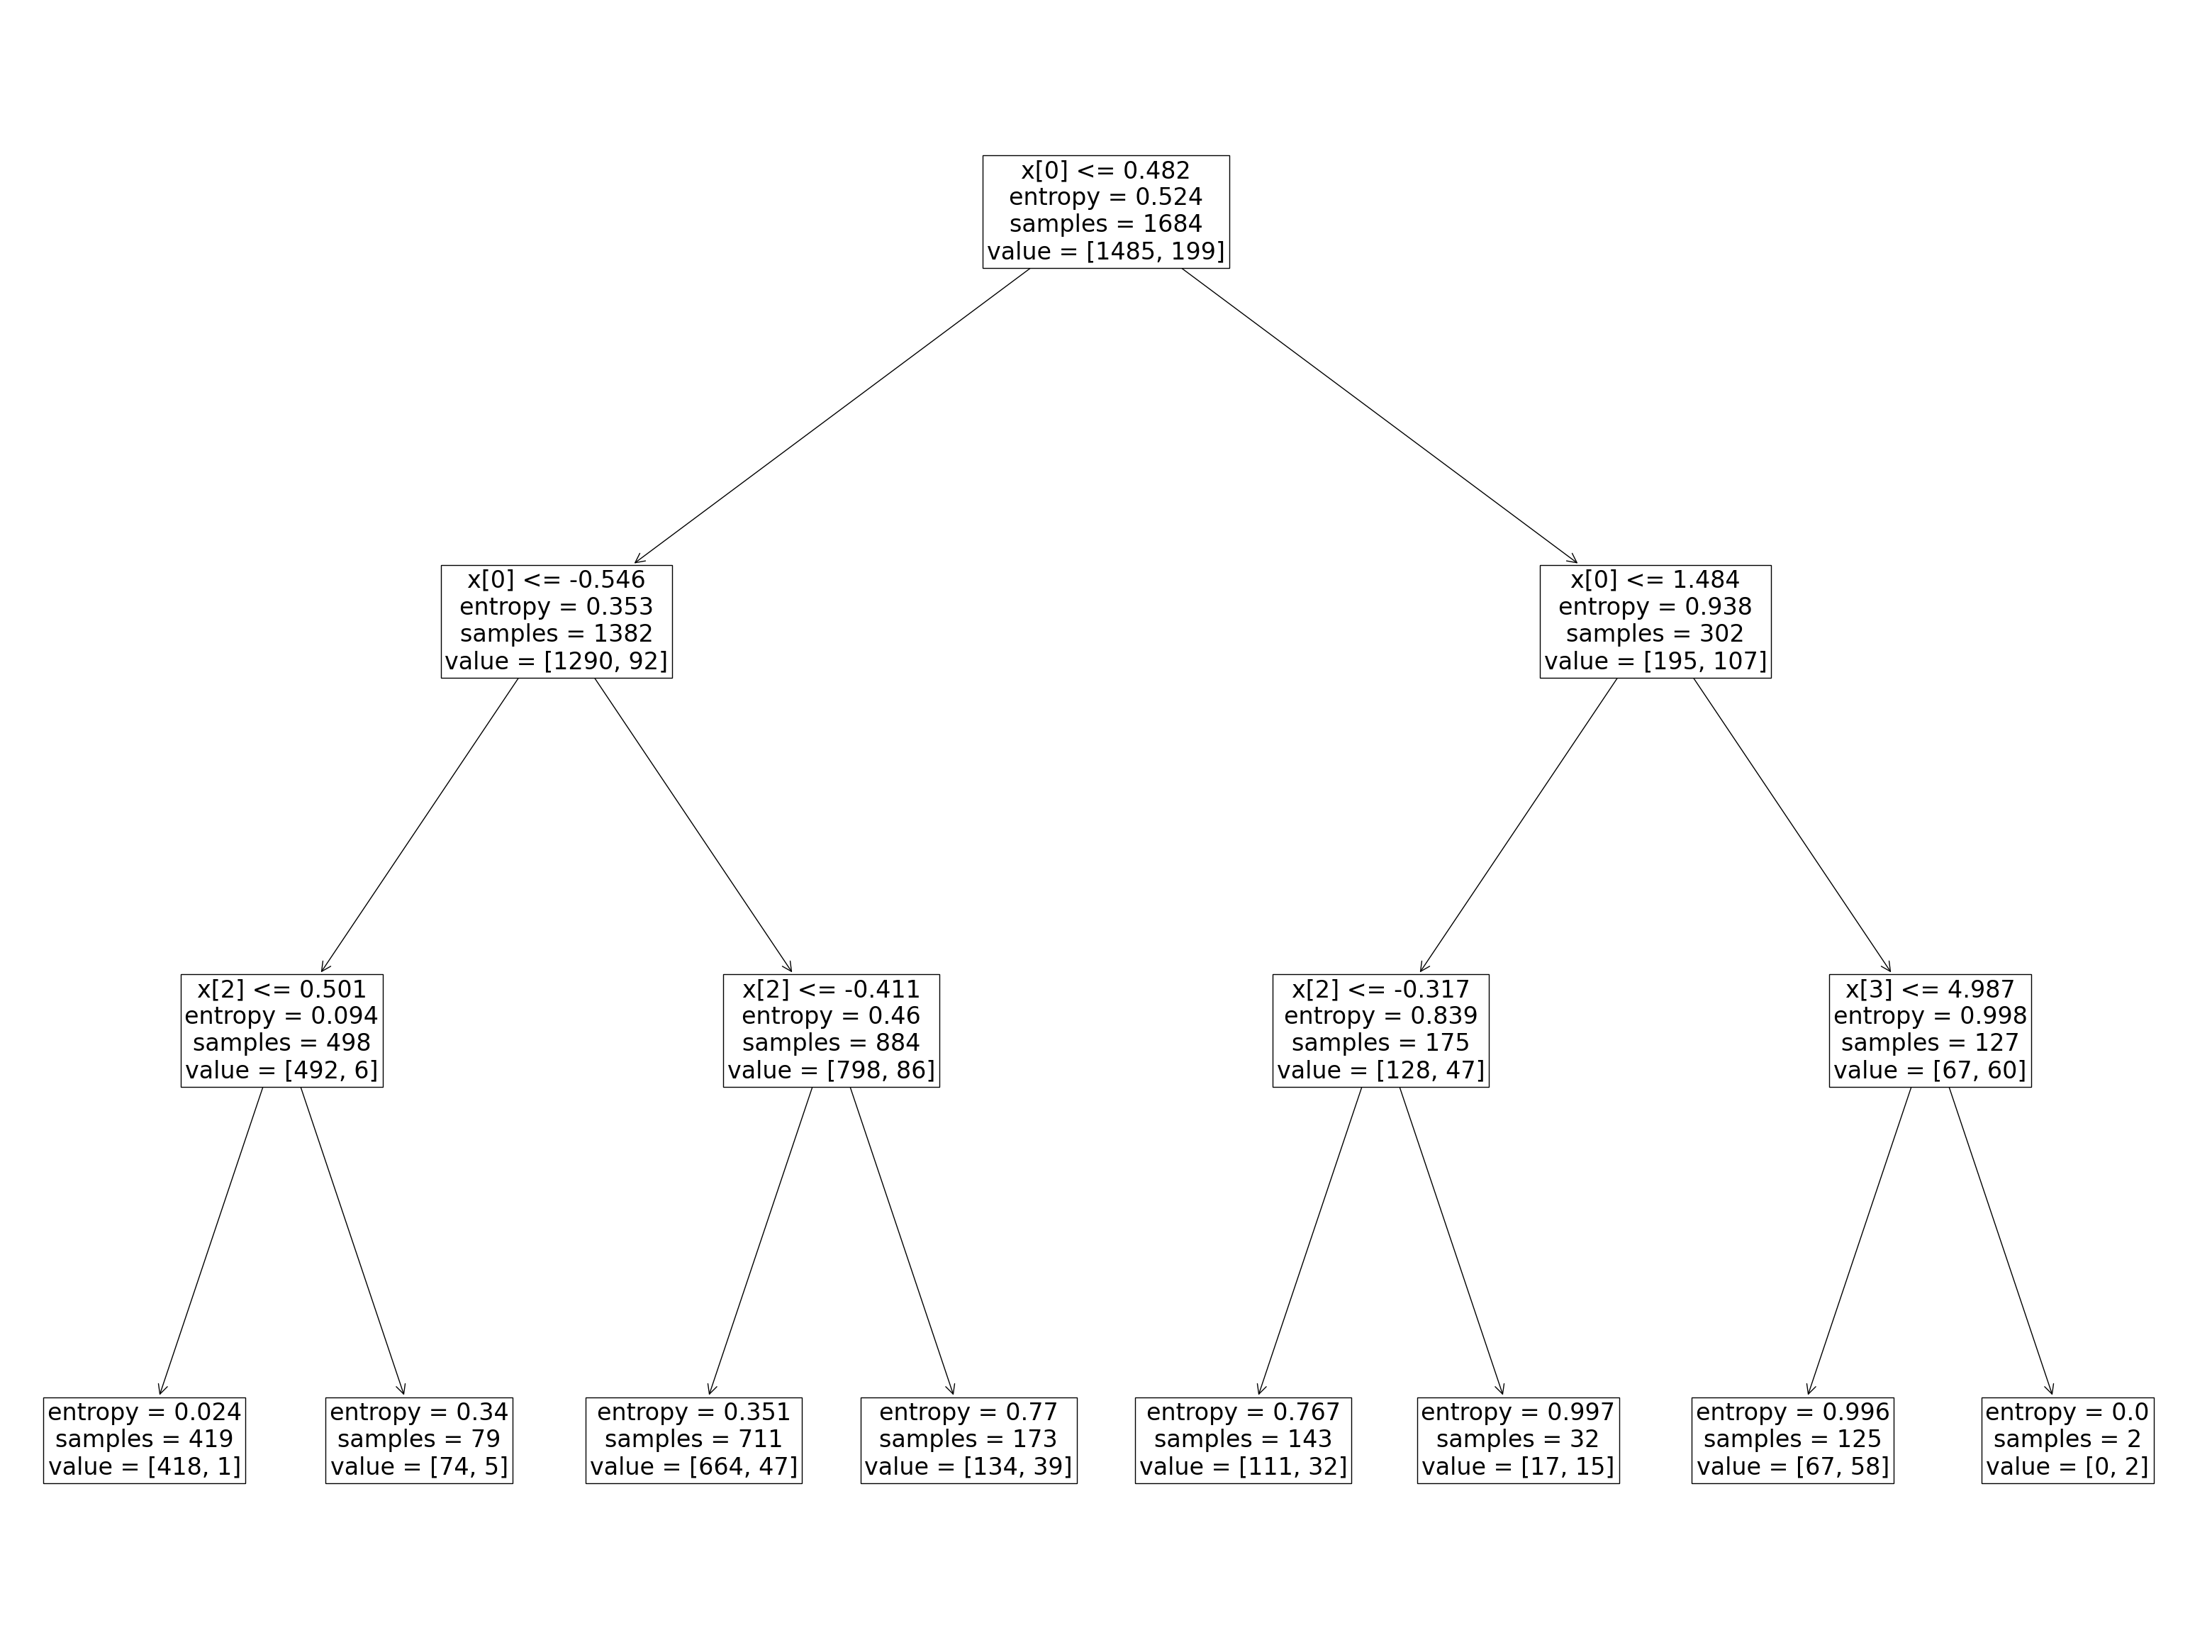

In [111]:
# Plotting the decision tree as required.\
from sklearn import tree
doc_data = tree.export_graphviz(classifier, out_file=None)
treegraph = graphviz.Source(doc_data)
fig = plt.figure(figsize=(40,30))
fig = tree.plot_tree(classifier,fontsize=24)
# treegraph

[HP 1] Are there any leaf nodes with an entropy > 0? If so, what does it mean? How does this model perform on the test dataset? Provide an example on how the results for a single sample can be interpreted.

In [112]:
# Your code for HP1 goes here
# Feel free to add cells below this for HP1

< Your answer for HP1 goes here >

There are 7 leafnodes having entropy more then 0. Which indicates that on such nodes, classfier has not been able to successfully classify some of the samples.

In [115]:
# Performnace of this modesl is as under:
train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

# Getting the accuracy using Predicted data.
testing_accuracy = accuracy_score(Y_test,test_predictions)
print ("Testing Accuracy is = %f" % (testing_accuracy*100))

training_accuracy = accuracy_score(Y_train,train_predictions)
print ("Training Accuracy is = %f" % (training_accuracy*100))


Testing Accuracy is = 89.501779
Training Accuracy is = 88.301663


For the training model has an accuracy of 88.3%, and for the testing, model has an accuracy of 89.5%. Which are nearby equivalent. For which we may say that there is **underfitting** crietarea in the model.

In [142]:
print('The sample to be consided for generation of Decision Path')
print("       ",'Duration:  ', 'campaign:   ','pdays:     ','previous: ')
X_test[3]

The sample to be consided for generation of Decision Path
        Duration:   campaign:    pdays:      previous: 


array([-0.67832613,  0.48368516, -0.40784839, -0.2475143 ])

In [143]:
n_nodes = classifier.tree_.node_count
left_child = classifier.tree_.children_left
right_child = classifier.tree_.children_right
feature = classifier.tree_.feature
threshold = classifier.tree_.threshold

node_indicator = classifier.decision_path(X_test)
leaf_id = classifier.apply(X_test)

sample_id = 3                         # Selecting 3 as sample id
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
index_node = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print(" {} Rules for predicting sample are as under:\n".format(sample_id))
for node_id in index_node:
    # Checking to process for the next node, if current node is a leaf node.
    if leaf_id[sample_id] == node_id:
        continue

    # checking if value of the split feature for sample 0 is below threshold or not
    if X_test[sample_id, feature[node_id]] > threshold[node_id]:
        threshold_sign = ">"
    else:
        threshold_sign = "<="

    print("decision node {} : (X_test[{}, {}] = {}) {} {})".format(node_id, sample_id, feature[node_id], X_test[sample_id, feature[node_id]],threshold_sign, threshold[node_id]))



 3 Rules for predicting sample are as under:

decision node 0 : (X_test[3, 0] = -0.6783261273923541) <= 0.48228819668293)
decision node 1 : (X_test[3, 0] = -0.6783261273923541) <= -0.5456562936306)
decision node 2 : (X_test[3, 2] = -0.4078483932071831) <= 0.5005955696105957)


[LP 4] Perform grid search with cross-validation to determine the best decision tree for the dataset and decide between the following hyperparamters:
  min_samples_split = [4, 10, 20]
  max_depth = [3, 4, 5]
Plot the best performing model.

In [144]:
# Your code for LP4 goes here
# Feel free to add cells below this for LP4

In [171]:
param_grid = {
    'min_samples_split': [4, 10, 20],
    'max_depth': [3, 4, 5],
    'criterion': ['entropy'],
    'random_state': [10]      
}

# Grid searching on the model to figure out the best fit parameters
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=Y_train, cv=5)

#Returning the best fit parameters
print('Accuracies of all folds: ',all_accuracies)

print('Best Params: ',grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)

Accuracies of all folds:  [0.87240356 0.87833828 0.884273   0.87537092 0.87797619]
Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 4, 'random_state': 10}
Best Score:  0.8770789176204608


In [172]:
# New classifier using final parameters
new_classifier = grid_search.best_estimator_
new_classifier.fit(X_train, Y_train)

# finding new predicted info.
Y_pred_new = new_classifier.predict(X_test)
Y_pred_new

testing_accuracy_modified = accuracy_score(Y_test, Y_pred_new)


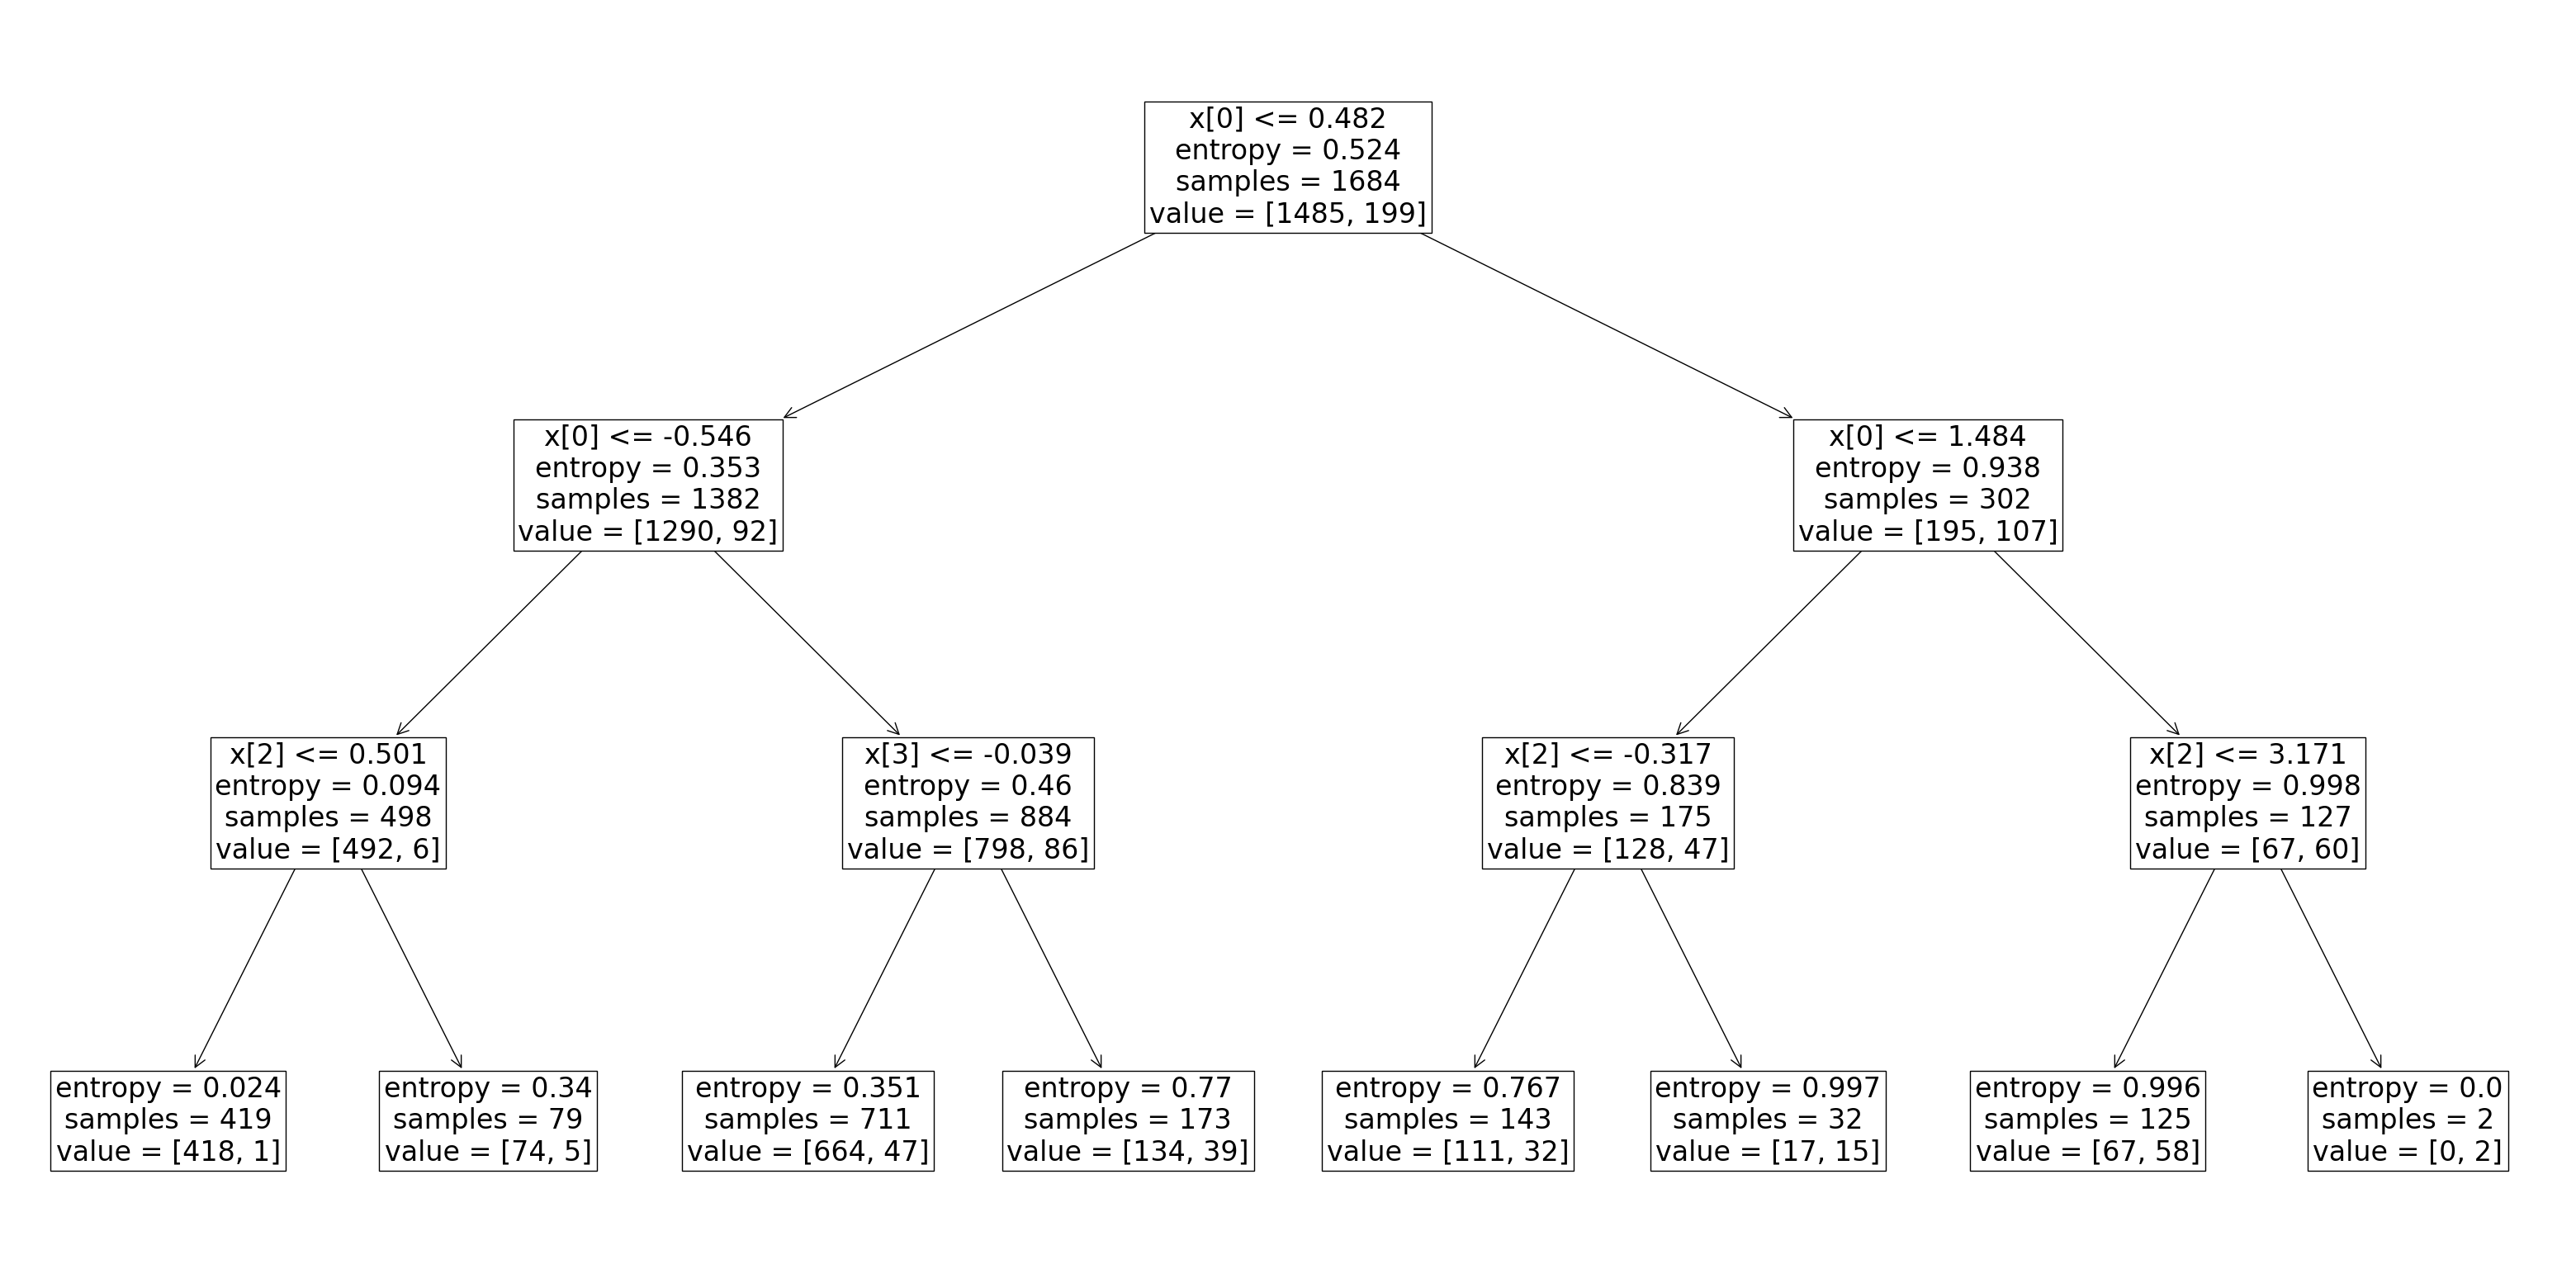

In [174]:
# Ploting the graph for new clasifier.
modified_doc_data = tree.export_graphviz(new_classifier, out_file=None)
final_graph = graphviz.Source(modified_doc_data)
final_graph
fig = plt.figure(figsize=(40,20))
fig = tree.plot_tree(new_classifier,fontsize=24)

[HP 2] Interpret the results of grid search CV for the decision tree and comment on the following:
1. How does the model perform on the test dataset? 
2. Based on the confusion matrix for the best performing model, do you think the model performs satisfactorily for the application?


In [175]:
# Your code for HP2 goes here
# Feel free to add cells below this for HP2
print('Old Test Score = {}% \n'.format(round(testing_accuracy,4)))
print("Test Accuracy after updating the classfier parameters is as under:")
print ("New Test Score = {}% \n".format(round(testing_accuracy_modified*100),4))
print("Confusion Matrix is as under:\n" , confusion_matrix(Y_test, Y_pred_new))

Old Test Score = 0.895% 

Test Accuracy after updating the classfier parameters is as under:
New Test Score = 90% 

Confusion Matrix is as under:
 [[503   0]
 [ 59   0]]


< Your answer for HP2 goes here >

1. The original model's training accuracy is 88.3%, and the testing accuracy is 89.5%. Here, testuing accuracy is more than the training accuracy. Thus, **underfitting** occured in this model. Compared to training data, the model works better for testing data.

2. From confusion matrix:
563 cases are executed, and 403 of those are True Negative and there are none that are true positive.

After Grid search the model's performance increases gainig the accuracy of 90%. This implies that the model is better than the original one.

# References
Include ALL your references here. 

*   https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html
*   https://www.section.io/engineering-education/entropy-information-gain-machine-learning/
*   https://pypi.org/project/graphviz/
*   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html



# What to turn in:
1. The ipynb solution file, which includes the references
2. If you use Colab or GitHub for version control, please share a link to your notebook or GitHub repository